In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from vachoppy.trajectory import LatticeHopping
from vachoppy.fingerprint import FingerPrint, CosineDistance

In [22]:
traj = trajectory.LatticeHopping(poscar_perf='data/POSCAR_novac',
                                 xdatcar='data/XDATCAR_01',
                                 interval=50, 
                                 target='O')

In [23]:
# traj.animation(update_alpha=0, label=True)

In [24]:
traj.check_connectivity(start=1)

there is no connected site.
find the vacancy site for your self. (step: 127)


In [25]:
traj.update_vac(step=127, lat_point=7) 
traj.check_connectivity(start=127)

In [26]:
traj.check_unique_vac()

vacancy is unique.


In [27]:
# traj.save_traj_on_lat(lat_point=[34, 59],
#                       step=[183, 184, 186],
#                       vac=True,
#                       label=True)

In [28]:
anal_hfo2 =  trajectory.Analyzer(traj=traj)

In [29]:
traj.check_connectivity(start=1)

In [30]:
traj.update_vac(step=127, lat_point=7) 
traj.check_connectivity(start=127)

In [31]:
traj.check_unique_vac()

vacancy is unique.


In [32]:
final_A = ['cn4', 'cn3', 'cn3', 'cn3', 'cn4', 'cn4', 'cn4']
final_B = ['cn3', 'cn4', 'cn4', 'cn4', 'cn3', 'cn3', 'cn3']

d_A = [2.54239, 2.57364, 2.78548, 2.83698, 2.93743, 2.96476, 2.98909]
d_B = [2.54239, 2.57563, 2.6619, 2.72384, 2.93743, 2.96476, 2.98909]

Ea_A = [0.74, 0.84, 0.85, 1.35, 1.91, 2.07, 2.01]
Ea_B = [0.08, 0.32, 0.86, 0.98, 1.25, 1.42, 1.36]

for i in range(7):
    anal_hfo2.add_path(f"A{i+1}", 'cn3', final_A[i], d_A[i], Ea_A[i])
    anal_hfo2.add_path(f"B{i+1}", 'cn4', final_B[i], d_B[i], Ea_B[i])

In [33]:
anal_hfo2.print_path()

name	init	final	d (Å)	Ea (eV)	dE (eV)
A1	cn3	cn4	2.542	0.74	Nan
A2	cn3	cn3	2.574	0.84	Nan
A3	cn3	cn3	2.785	0.85	Nan
A4	cn3	cn3	2.837	1.35	Nan
A5	cn3	cn4	2.937	1.91	Nan
A6	cn3	cn4	2.965	2.07	Nan
A7	cn3	cn4	2.989	2.01	Nan
B1	cn4	cn3	2.542	0.08	Nan
B2	cn4	cn4	2.576	0.32	Nan
B3	cn4	cn4	2.662	0.86	Nan
B4	cn4	cn4	2.724	0.98	Nan
B5	cn4	cn3	2.937	1.25	Nan
B6	cn4	cn3	2.965	1.42	Nan
B7	cn4	cn3	2.989	1.36	Nan


In [34]:
for lat_p in anal_hfo2.lat_points:
    x_coord = lat_p['coord'][0]
    if 0.13796 < x_coord < 0.36204 or 0.63796 < x_coord < 0.86204:
        lat_p['site'] = 'cn4'
    else:
        lat_p['site'] = 'cn3'

unknown steps are detected.: [116, 118, 125, 127, 186, 246, 247]
xdatcar file : data/XDATCAR_01
poscar_per file: data/POSCAR_novac

total counts : 42
hopping sequence :
A3 A3 A3 A3 A1 B1 A1 B2 B2 B1 A3 A1 B1 A3 A3 A4 A1 B7 A1 unknown unknown A1 unknown unknown B1 A1 B1 unknown A1 B3 B3 B3 B3 B3 B3 unknown unknown B7 A7 B1 A1 B3 
maximum Ea : 2.01 eV


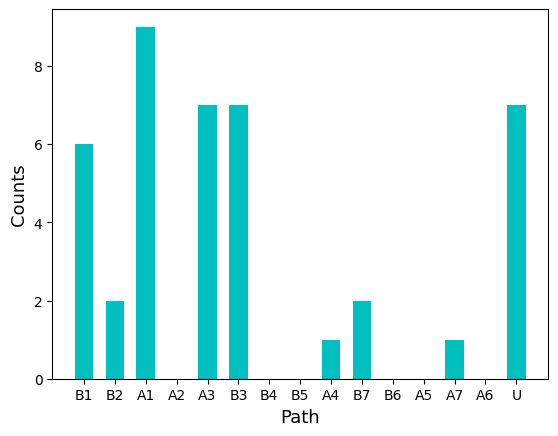

In [35]:
anal_hfo2.search_path_vac()
anal_hfo2.print_summary(figure='counts_init.png',
                        save_figure=True,
                        sort=True)

unknown steps are detected.: [116, 118, 186, 246, 247]
xdatcar file : data/XDATCAR_01
poscar_per file: data/POSCAR_novac

total counts : 42
hopping sequence :
A3 A3 A3 A3 A1 B1 A1 B2 B2 B1 A3 A1 B1 A3 A3 A4 A1 B7 A1 unknown unknown A1 New New B1 A1 B1 unknown A1 B3 B3 B3 B3 B3 B3 unknown unknown B7 A7 B1 A1 B3 
maximum Ea : 3.94 eV


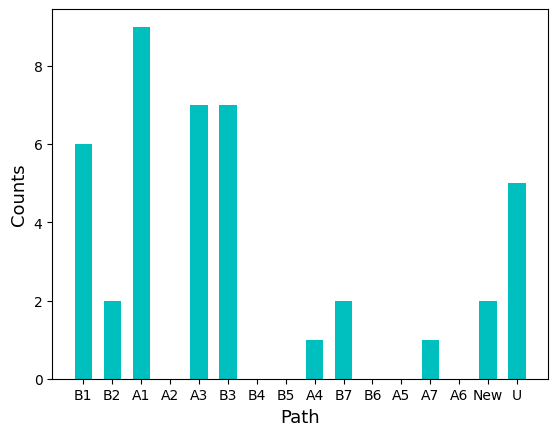

In [36]:
anal_hfo2.add_path('New', 'cn4', 'cn4', 3.6471, 3.94)
anal_hfo2.search_path_vac()
anal_hfo2.print_summary(figure='counts_new_path.png',
                        save_figure=True,
                        sort=True)

unknown path exist.
step: 186 
xdatcar file : data/XDATCAR_01
poscar_per file: data/POSCAR_novac

total counts : 46
hopping sequence :
A3 A3 A3 A3 A1 B1 A1 B2 B2 B1 A3 A1 B1 A3 A3 A4 A1 B7 A1 B5 A3 A3 A3 A1 New New B1 A1 B1 unknown A1 B3 B3 B3 B3 B3 B3 New B3 B3 New B7 A7 B1 A1 B3 
maximum Ea : 3.94 eV


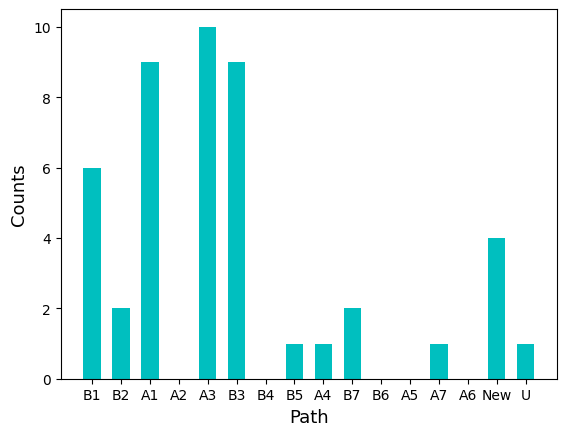

In [37]:
anal_hfo2.unwrap_path()
anal_hfo2.print_summary(figure='counts_correct.png',
                        save_figure=True,
                        sort=True)

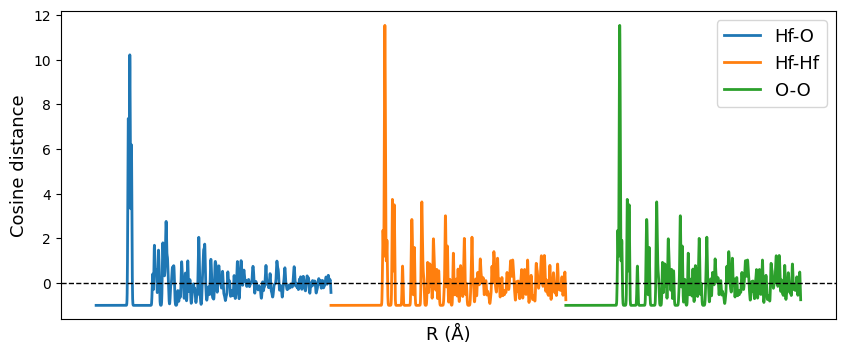

In [58]:
from vachoppy.fingerprint import FingerPrint, CosineDistance

# path of poscar
poscar_m = 'data/poscars_hfo2/POSCAR_mHfO2'
poscar_t = 'data/poscars_hfo2/POSCAR_mHfO2'

# parameters of fingerprints
Rmax, delta, sigma = 15, 0.01, 0.03

# get fingerprint function
fp_m_hfo = FingerPrint('Hf','O', poscar_m, Rmax, delta, sigma)
fp_m_hfhf = FingerPrint('Hf','Hf', poscar_m, Rmax, delta, sigma)
fp_m_oo = FingerPrint('Hf','Hf', poscar_m, Rmax, delta, sigma)

# plot fingerprints
x_hfo = fp_m_hfo.R
x_hfhf = fp_m_hfhf.R + x_hfo[-1]
x_oo = fp_m_oo.R + x_hfhf[-1]

plt.figure(figsize=(10, 4))
plt.plot(x_hfo, fp_m_hfo.fingerprint, linewidth=2, label='Hf-O')
plt.plot(x_hfhf, fp_m_hfhf.fingerprint, linewidth=2, label='Hf-Hf')
plt.plot(x_oo, fp_m_oo.fingerprint, linewidth=2, label='O-O')
plt.axhline(0, 0, 1, color='k', linestyle='--', linewidth=1)

plt.xticks([],[])
plt.xlabel('R (Å)', fontsize=13)
plt.ylabel('Cosine distance', fontsize=13)

plt.legend(fontsize=13)
plt.savefig('D_cos_mono.png', dpi=300)
plt.show()